# Problem statement

Create famous 'Frog leap' puzzle game. Try completing the game before starting to get an idea about its working.
[Demonstration](https://www.neok12.com/games/leap-froggies/leap-froggies.htm).


### Rules ###
1. The left set of frogs can only move right, the right set of frogs can only move left.
2. Frogs can move forward one space, or move two spaces by jumping over another frog from opposite side.
3. The puzzle is solved when the two sets of frogs have switched positions.


## Steps to solve the problem:
### Step1:-
- Display green and brown frogs on the left and right sides initially.

Initial Display :-  
```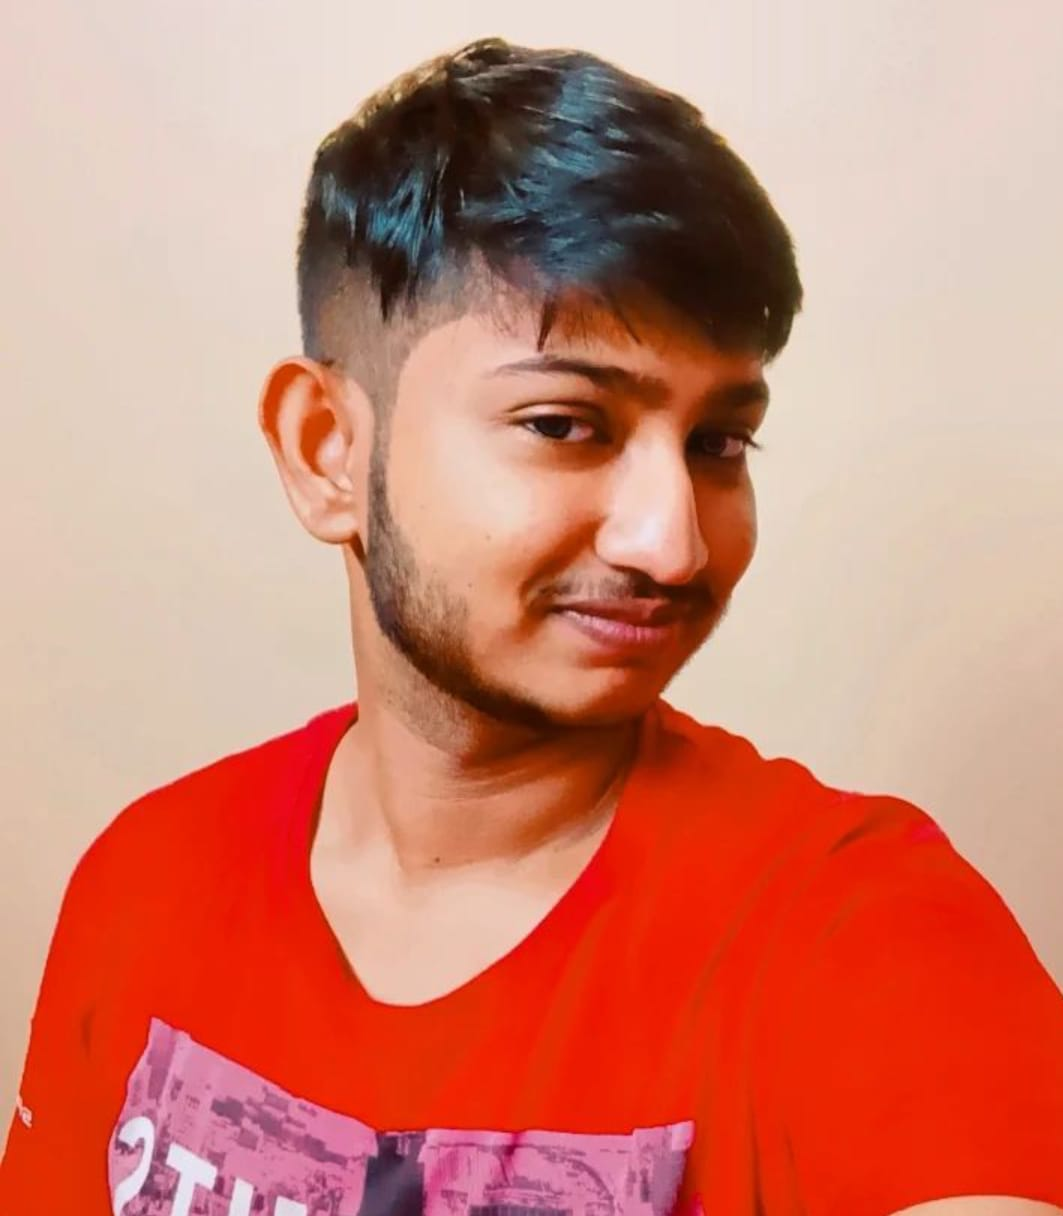
[ 0 ,  1 ,  2 ,  3 ,  4 ,  5 ,  6 ]
['G', 'G', 'G', '-', 'B', 'B', 'B']
```
<br>
Here 'G' represents Green frogs on the left side and 'B' represents brown frogs on the right side. The '-' defines the position of empty leaf.
(You can change display according to your imagination or convinience)

### Step2:-
Accept positions of the frog that you want to move.<br>
Example: If we enter position 2 then the game will look like this:-
```
[ 0 ,  1 ,  2 ,  3 ,  4 ,  5 ,  6 ]
['G', 'G', '-', 'G', 'B', 'B', 'B']
```

### Step3:- ###
Define Invalid moves and add conditional 'if' statements accordingly
#### Rules
1. Entered position should be between 0 to 6. Or a character 'q' to quit the game.
2. Entered position cannot be the position of empty leaf.
3. If the selected frog position cannot perform the contraints given in rule 2 then the move is invalid.

### Step4:-
Make the appropriate move by changing the game display.

# ***Creating a General Frog Leaping Game***

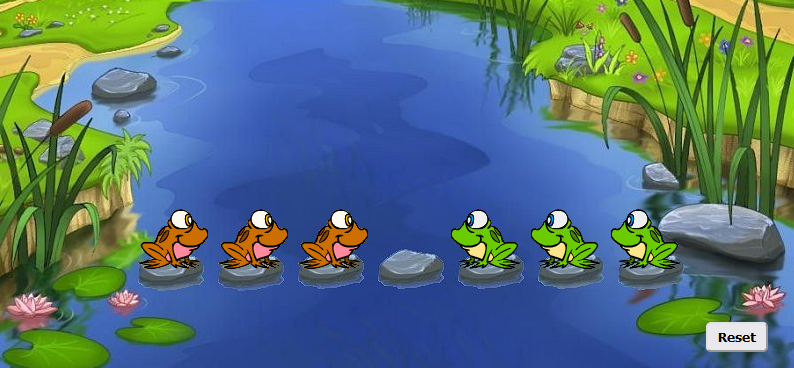

##Bored by playing the game with 3 pair of frogs?
*Try to test your skills upto 7 pair of frogs.<br>Go Ahead and Play Directly*
<br>[Click Here](https://colab.research.google.com/drive/1lS2u3wS320gzYpZ3QVZuPBVMOvGzifHq#scrollTo=nxCQWrMua91P&line=3&uniqifier=1)


# ***Stepwise Solution***

## Step - '#'<br>
###Defining the genral rules for player
AIM : To move all 🟢 frogs to right and 🟤 frogs to left
1. A frog can only jump in a given direction
2. A frog can jump over only 1 frog at a time
3. A frog can also jump to nearby vacant rock in given direction
4. 5 Invalid moves and you loose.

**We are using a non-parametrized function to display the rules of the game.*

In [ ]:
def rules():
    print("\nAIM : To move all \U0001f7e2 frogs to right and \U0001f7e4 frogs to left ")
    print("1. A frog can only jump in a given direction")
    print("2. A frog can jump over only 1 frog at a time")
    print("3. A frog can also jump to nearby vacant rock in given direction")
    print("4. 5 Invalid moves and you loose.")
    print("CROAKS! \U0001F438 Good Luck!")

rules()

## Step 1

Initialize the variables G and B with Green Colored and Brown Colored Circles respectively,

In [ ]:
G="\U0001f7e2" #Displays 🟢
B="\U0001f7e4" #Displays 🟤


Well, we can create a **General Frog Leap Game** that lets you pick how hard or easy you want it to be by choosing how many frogs you play with.

*  We call this the "difficulty level," which is a number strictly `between 1 and 7`.

*  Player trying to pick a number outside this range, the game won't let you move forward due to the use of `while()` loop.

*Give it a try and see what happens!*

In [ ]:
# Check Difficulty Level

lvl=0
while(lvl>7 or lvl<1):                                                            # Will loop unless and until the input lies between a desired range
    print("\n\nChoose your Difficulty between [1\U0001F913 to 7\U0001F60F]")
    lvl=int(input("Enter your choice: "))                                         # Takes input for number of frogs at same kind
    if (lvl>7 or lvl<1):                                                          # Checks if the input strictly lies between the range or not
        print("REALLY?!! \U0001F611 Choose between 1 and 7")
        print("Try Again")

Depending on the diffiulty level you want, that input `lvl` is passed as a parameter to the function called `difficulty()`

*  This `difficulty()` function will generate a list contains the `lvl` number of frogs as variables `G, B` and single character `'-'` in the same sequence as given in the initial display state. After generating the list it will return the list.

*  This list, representing the initial setup of the game, is then stored in a variable called `positions` in the main part of the game.

*  So, the `difficulty()` function helps set up the game according to your chosen difficulty level.

In [ ]:
def difficulty(level):
    arr=[]
    B="\U0001f7e4"               # Displays 🟤
    G="\U0001f7e2"               # Displays 🟢
    for i in range(level):       # Appends level times 🟢 in the beginning of list
        arr.append(G)
    arr.append('-')              # Appends '-' in the middle of list
    for i in range(level):       # Appends level times 🟤 in the ending of list
        arr.append(B)
    return arr

We'll also pass the input to another function called `indx()`.

*  This function will give back a list of numbers as index ranging from `0 to lvl*2+1` that we'll use in the main part of the game.

*  The function `indx()` will help us to locate the frogs and to determine the next movements.

In [ ]:
def indx(level):
    ind=[]
    for i in range(2*level+1):   # List ranging from 0 to difficulty level*2 + 1
        ind.append(str(i))       # Appending numbers
    return ind

After returning the lists, it will display on screen, showing the list of `positions` [frogs] and `arr` [indices] over it. <br>Moreover, we use `''.join(list)` function to convert the list into a string, for better **visual representation**.

It will look somwhat like this:

```
0    1    2    3    4    5    6
🟢   🟢   🟢   -   🟤   🟤   🟤
```
*Why don't you try and see for yourself?*

In [ ]:
positions=difficulty(lvl)         # Passing the values to the functions
arr=indx(lvl)
B="\U0001f7e4"                    # Initializing in local body
G="\U0001f7e2"                    # Initializing in local body
count=0                           # Initializing Count = 0 For measuring "Invalid Move"

# Initial Display

print('    '.join(arr))           # Displays the index list in string for visual presentation
print('   '.join(positions))      # Displays the frog positioning list in string for visual presentation


## Step 2
After displaying the initial positions of the frogs. We will start a `while(True)` loop which will be iterating  unless and until the following condidtions come into exist:


1.   The player wants to "Quit" the game.
2.   When `count==4`, determines that player can maximum make 4 "Invalid Move".
3.   The player "Wins" the game.

```
while True:
    # Defining Multiple Conditions and Movement of List Elements
```

Then coming inside the `while()` loop,

Take position input from user and write a message as

```
Press q to quit else
Enter position of piece:
```
Now the taken input is in string format.

*  So first check if the input is `'q'` character.
*  If input is `'q'` then the person is quiting the game so print `'You Lose!'`.



In [ ]:
print("\nPress 'q' to quit else")                 # Player enters the input
position = input("Enter position of piece: ")

if position == 'q':                               # If player enters 'q' then they quit the game
    print("You Lose!")

If input character is not `'q'` then it has to be some integer. so convert input to integer format.

In [ ]:
position = int(position)
print(type(position))                     # Check the datatype of the variable

Now we have to check validity of the selected positions or move.<br>
If the entered number `isn't between 0 and lvl*2`, then print `'Invalid move'`.

In [ ]:
if position < 0 or position > (lvl*2):          # Check the presence of the position within the given range
    print('Invalid Move')

A frog should be present on the selected position to make a move. <br>If leaf is selected then it doesn't make sense. <br>Therefore, if entered postition is same as the postition of empty leaf then the move is invalid and print `Invalid Move`

In [ ]:
if positions[position] == '-':          # If player tries to select the blank place
    print('Invalid Move')

Initialize a variable named `pos2` at value 0, to store the index of empty leaf, so that we can use it later.

In [ ]:
pos2 = 0        # Initializing pos2 as 0

Now depending on the input by the player, determine the movement of the frogs in the list.

If the input index consists of any `G` [Green Frog], Continue the following steps.


```   
IF the frog at the given position is green (G) THEN
    IF the position + 1 is within the valid range (less than or equal to double the difficulty level) AND the next position is empty ('-') THEN
        Set pos2 to position + 1  # Move one space to the right
    ELSE IF the position + 2 is within the valid range AND the position + 2 is empty AND the next position contains a brown frog (B) THEN
        Set pos2 to position + 2  # Jump two spaces to the right, skipping over the brown frog
    ELSE
        Print 'Invalid Move'
        Increment count by 1  # Keep track of invalid moves
        Continue to the next iteration of the loop      
```

In [ ]:
if positions[position] == G:        # Determining if the selected position contains G
    if position + 1 <= (lvl*2) and positions[position + 1] == '-':   # Determing the possibility of 1 Jump
        pos2 = position + 1
    elif position + 2 <= (lvl*2) and positions[position + 2] == '-' and positions[position + 1] == B:   # Determining the possibility of 2 Jump
        pos2 = position + 2
    else:   # Will Display on erroneous input
        print('Invalid Move')
        count+=1

If not `G`, but if the input index consists of any `B` [Brown Frog], Continue the following steps.

```
    ELSE IF the frog at the given position is brown (B) THEN
    IF the position - 1 is within the valid range (greater than or equal to zero) AND the previous position is empty ('-') THEN
        Set pos2 to position - 1  # Move one space to the left
    ELSE IF the position - 2 is within the valid range AND the position - 2 is empty AND the previous position contains a green frog (G) THEN
        Set pos2 to position - 2  # Jump two spaces to the left, skipping over the green frog
    ELSE
        Print 'Invalid Move'
        Increment count by 1  # Keep track of invalid moves
        Continue to the next iteration of the loop
```

In [ ]:
elif positions[position] == B:      # Determining if the selected position contains B
        if position - 1 >= 0 and positions[position - 1] == '-':   # Determing the possibility of 1 Jump
            pos2 = position - 1
        elif position - 2 >= 0 and positions[position - 2] == '-' and positions[position - 1] == G:   # Determining the possibility of 2 Jump
            pos2 = position - 2
        else:   # Will Display on erroneous input
            print('Invalid Move')
            count+=1

Swap the element at selected positions and calculated position2 `pos2` in the list.<br> So basically we are moving the frog to next valid position by swapping elelments of array.

In [ ]:
positions[position], positions[pos2] = positions[pos2], positions[position]     # Swap the places of frog and blank space

Now print the display of the game again to see the change.<br>
If we enter position 2, `pos2` then the output will look like this:-
```
0    1    2    3    4    5    6
🟢   🟢   -   🟢   🟤   🟤   🟤
```
It will be displaying the immediate positions of the frog.

In [ ]:
print('    '.join(arr))           # For representing the indexes as a String for visual understanding
print('   '.join(positions))      # For representing the frogs as a String for visual understanding

#Step 3
To check if the player wins or not, we can define a function `check(positions,lvl)`

Check for winning condition by comparing the elements of list. If player has won the game print `'You Win'`

In [ ]:
def check(positions,level):
    B="\U0001f7e4"                # Displays 🟤
    G="\U0001f7e2"                # Displays 🟢
    checkarr=[]
    for i in range(level):        # Appends level times 🟤 in the beginning of list
        checkarr.append(B)
    checkarr.append('-')          # Appends '-' in the middle of list
    for i in range(level):        # Appends level times 🟢 in the ending of list
        checkarr.append(G)
    if positions==checkarr:       # Checks if the reverese of beginning positions and immediate positions are equal or not
        return True               # Return True if condition matches
    return False

To determine, if the immediate positions of frogs are the exact inverse positions at the beginning, we will pass the list `positions` and `lvl` to `check(positions,level)` function
*  Firstly, it will generate a list `checkarr=[]` where the first half of the list will contain the `B` [Brown Frogs] and the last half will contain `G` [Green Frogs], with a character `'-'` in middle of the list.
*  Then it will check the condition if the funtion passed list i.e `positions` and the generated list `checkarr=[]` are equal or not.
*  if `positions==checkarr:` is `True`, then `return True` [Boolean]
*  if not `return False`


Coming to the main program, if the returned value of function `check(positions,lvl)` is True, then it will show a message as `'You Win!'` then quits the game.
```
You Win!
```



In [ ]:
if check(positions,lvl):      # If check() return True, then the player is declared as winner
  print('You Win!')

Now the game should keep running until the player quits, so place all conditional statements inside an infinite loop.<br>

1. We have to `'break'` the loop if the player presses `'q'` and quits.

2. If the move made by player is `'Invalid Move'` then we have to `'continue'` without executing remaining part of the selected iteration. Moreover, if the player enters more than 4 `'Invalid Move'`, it will automatically `break` the loop and quits.

3. If player wins the game we have to `break` the loop.


```
Infinite loop:
    (inside loop)
    1.Take input
    2.Check all valid and invalid conditions of `pos`.
    3.Make the appropriate move by calculating `pos2`.
    4.Display game
    4.Check winning condition
```

In [ ]:
if count==4:                                        # If player has more than 4 Invalid Moves, it will automatically quit the game
  print("Uh-oh! Looks like you are stuck!")
  print("Start Again!")

# Code PlayGround

In [ ]:
def rules():                     # Dsiplaying th general rules of the game
    print("\nAIM : To move all \U0001f7e2 frogs to right and \U0001f7e4 frogs to left ")
    print("1. A frog can only jump in a given direction")
    print("2. A frog can jump over only 1 frog at a time")
    print("3. A frog can also jump to nearby vacant rock in given direction")
    print("4. 5 Invalid moves and you loose.")
    print("CROAKS! \U0001F438 Good Luck!")


def difficulty(level):
    arr=[]
    B="\U0001f7e4"               # Displays 🟤
    G="\U0001f7e2"               # Displays 🟢
    for i in range(level):       # Appends level times 🟢 in the beginning of list
        arr.append(G)
    arr.append('-')              # Appends '-' in the middle of list
    for i in range(level):       # Appends level times 🟤 in the ending of list
        arr.append(B)
    return arr

def indx(level):
    ind=[]
    for i in range(2*level+1):   # List ranging from 0 to difficulty level*2 + 1
        ind.append(str(i))       # Appending numbers
    return ind

def check(positions,level):
    B="\U0001f7e4"                # Displays 🟤
    G="\U0001f7e2"                # Displays 🟢
    checkarr=[]
    for i in range(level):        # Appends level times 🟤 in the beginning of list
        checkarr.append(B)
    checkarr.append('-')          # Appends '-' in the middle of list
    for i in range(level):        # Appends level times 🟢 in the ending of list
        checkarr.append(G)
    if positions==checkarr:       # Checks if the reverese of beginning positions and immediate positions are equal or not
        return True               # Return True if condition matches
    return False


#def main
lvl=0
rules()                           # Displays the general rules before the acual game
while(lvl>7 or lvl<1):                                                            # Will loop unless and until the input lies between a desired range
    print("\n\nChoose your Difficulty between [1\U0001F913 to 7\U0001F60F]")
    lvl=int(input("Enter your choice: "))                                         # Takes input for number of frogs at same kind
    if (lvl>7 or lvl<1):                                                          # Checks if the input strictly lies between the range or not
        print("REALLY?!! \U0001F611 Choose between 1 and 7")
        print("Try Again")

positions=difficulty(lvl)         # Passing the values to the functions
arr=indx(lvl)
# Step 1

G="\U0001f7e2"                    # Displays 🟢
B="\U0001f7e4"                    # Displays 🟤
count=0                           # Initializing Count = 0 For measuring "Invalid Move"
# Initial Display

print('    '.join(arr))           # Displays the index list in string for visual presentation
print('   '.join(positions))      # Displays the frog positioning list in string for visual presentation

while True:
    print("\nPress 'q' to quit else")
    position = input("Enter position of piece: ")     # Players enter the input

    if position == 'q':                               # If player enters 'q' then they quit the game
        print("You Lose!")
        break
    if count==4:                                      # If player has more than 4 Invalid Moves, it will automatically quit the game
        print("Uh-oh! Looks like you are stuck!")
        print("Start Again!")
        break

    position = int(position)                          # Converts the input string to interger [Type Conversion]

    # Step 2: Check Validity of Move
    if position < 0 or position > (lvl*2):            # Check the presence of the position within the given range
        print('Invalid Move')
        continue

    if positions[position] == '-':                    # If player tries to select the blank place
        print('Invalid Move')
        continue

    pos2 = 0                                          # Intializing pos2=0

    # Step 3: Check frog color and conditions for valid moves
    if positions[position] == G:                                      # Determining if the selected position contains G
        if position + 1 <= (lvl*2) and positions[position + 1] == '-':      # Determing the possibility of 1 Jump
            pos2 = position + 1
        elif position + 2 <= (lvl*2) and positions[position + 2] == '-' and positions[position + 1] == B:   # Determing the possibility of 2 Jump
            pos2 = position + 2
        else:                                   # Will Display on erroneous input
            print('Invalid Move')
            count+=1
            continue
    elif positions[position] == B:                                    # Determining if the selected position contains B
        if position - 1 >= 0 and positions[position - 1] == '-':      # Determing the possibility of 1 Jump
            pos2 = position - 1
        elif position - 2 >= 0 and positions[position - 2] == '-' and positions[position - 1] == G:   # Determing the possibility of 2 Jump
            pos2 = position - 2
        else:                                   # Will Display on erroneous input
            print('Invalid Move')
            count+=1
            continue

    # Step 4: Swap elements to make the move
    positions[position], positions[pos2] = positions[pos2], positions[position]   # Swap the places of frog and blank space

    # Display game
    print('    '.join(arr))             # Displays the index list in string for visual presentation
    print('   '.join(positions))        # Displays the frog positioning list in string for visual presentation

    # Check winning condition
    if check(positions,lvl):            # If check() return True, then the player is declared as winner
        print('You Win!')
        break



AIM : To move all 🟢 frogs to right and 🟤 frogs to left 
1. A frog can only jump in a given direction
2. A frog can jump over only 1 frog at a time
3. A frog can also jump to nearby vacant rock in given direction
4. 5 Invalid moves and you loose.
CROAKS! 🐸 Good Luck!


Choose your Difficulty between [1🤓 to 7😏]
Enter your choice: 1
0    1    2
🟢   -   🟤

Press 'q' to quit else
Enter position of piece: 2
0    1    2
🟢   🟤   -

Press 'q' to quit else
Enter position of piece: 0
0    1    2
-   🟤   🟢

Press 'q' to quit else
Enter position of piece: 1
0    1    2
🟤   -   🟢
You Win!
